In [21]:
import pandas as pd

In [22]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Challenge TelecomX - Parte 2/datos_tratados.csv")

In [23]:
df = df.dropna(subset=["churn"])

In [24]:
X = df.drop("churn", axis=1)
y = df["churn"]

In [25]:
X = pd.get_dummies(X, drop_first=True)

## División del conjunto de datos

Se divide el dataset en conjunto de entrenamiento (80%) y conjunto de prueba (20%) para evaluar el rendimiento del modelo.  
Se utiliza estratificación para mantener la proporción original de la variable churn en ambos subconjuntos.

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [27]:
print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)

Tamaño entrenamiento: (5634, 7067)
Tamaño prueba: (1409, 7067)


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[960  75]
 [214 160]]
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1035
         1.0       0.68      0.43      0.53       374

    accuracy                           0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [30]:
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False).head(10)

,0
cargo_total,0.094601
antiguedad_meses,0.086772
cargo_mensual,0.078471
cargo_diario,0.073457
account_contract_mensual,0.034741
num_servicios,0.031675
internet_internetservice_fiber optic,0.023682
account_contract_bianual,0.020581
internet_internetservice_no,0.017017
account_paperlessbilling_yes,0.016491


In [31]:
proporcion = df["churn"].value_counts(normalize=True) * 100
print(proporcion)

churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_bal = RandomForestClassifier(
    random_state=42,
    class_weight="balanced"
)

rf_bal.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [33]:
from sklearn.metrics import classification_report

y_pred_bal = rf_bal.predict(X_test)

print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1035
         1.0       0.65      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



Se evaluó la necesidad de normalización o estandarización de los datos. Dado que el modelo principal utilizado (Random Forest) está basado en árboles de decisión, no es sensible a la escala de las variables, por lo que no fue necesario aplicar técnicas de normalización. En caso de utilizar modelos basados en distancia o gradiente, como Regresión Logística o SVM, este paso sería imprescindible.

In [34]:
corr_matrix = df.select_dtypes(include=["number"]).corr()

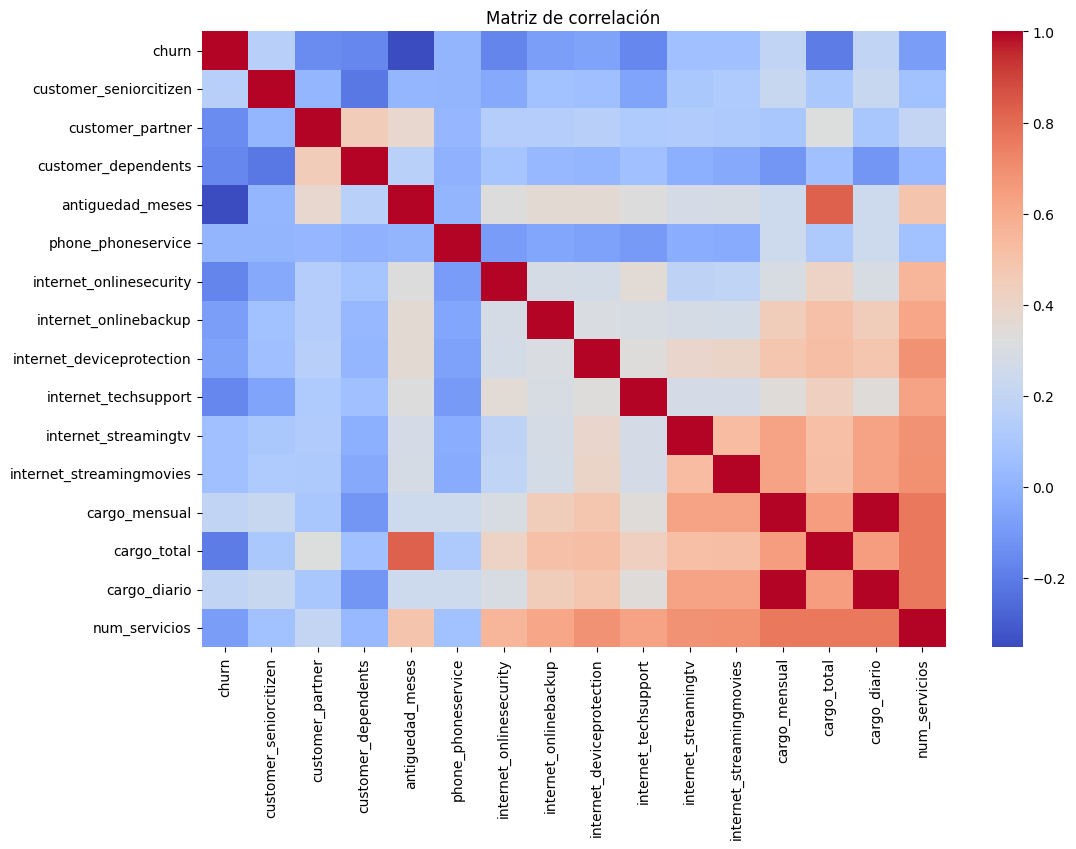

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Solo variables numéricas
corr_matrix = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

In [36]:
corr_churn = corr_matrix["churn"].sort_values(ascending=False)
print(corr_churn)

churn                        1.000000
cargo_mensual                0.193356
cargo_diario                 0.193356
customer_seniorcitizen       0.150889
internet_streamingtv         0.063228
internet_streamingmovies     0.061382
phone_phoneservice           0.011942
internet_deviceprotection   -0.066160
internet_onlinebackup       -0.082255
num_servicios               -0.085963
customer_partner            -0.150448
customer_dependents         -0.164221
internet_techsupport        -0.164674
internet_onlinesecurity     -0.171226
cargo_total                 -0.199484
antiguedad_meses            -0.352229
Name: churn, dtype: float64


El análisis de correlación muestra que la variable con mayor relación con la cancelación es la antigüedad del cliente (-0.35), indicando que los clientes más recientes presentan mayor probabilidad de churn. Asimismo, los cargos mensuales presentan correlación positiva (~0.19), sugiriendo que mayores costos incrementan el riesgo de cancelación. Variables relacionadas con servicios adicionales como soporte técnico y seguridad en línea presentan correlación negativa, lo que sugiere que la diversificación de servicios aumenta la fidelización del cliente.

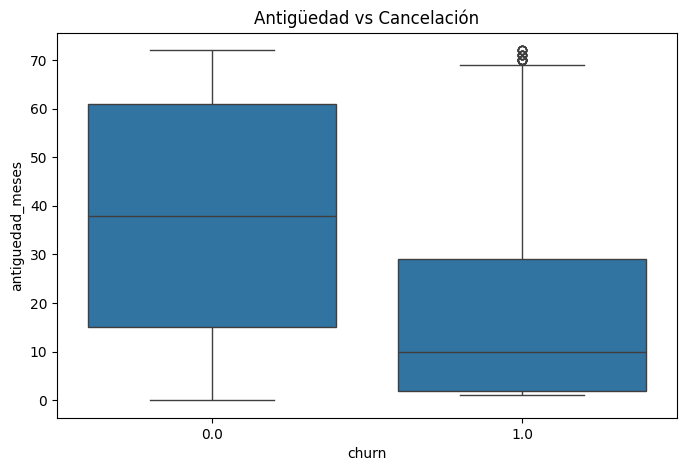

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="antiguedad_meses", data=df)
plt.title("Antigüedad vs Cancelación")
plt.show()

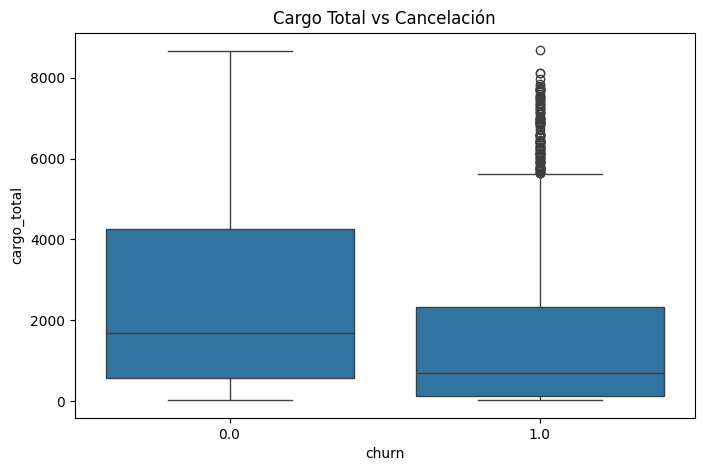

In [38]:
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="cargo_total", data=df)
plt.title("Cargo Total vs Cancelación")
plt.show()

El análisis visual confirma que la antigüedad es uno de los factores más relevantes en la cancelación. Los clientes que cancelan presentan una mediana de antigüedad considerablemente menor que los clientes activos. Asimismo, el cargo total es menor en clientes churn, lo cual se explica por su menor tiempo de permanencia. Estos hallazgos son coherentes con la matriz de correlación y con la importancia de variables identificada por el modelo Random Forest.

In [50]:
X = df.drop("churn", axis=1)
y = df["churn"]

In [51]:
X = pd.get_dummies(X, drop_first=True)
X = X.fillna(0)

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_log = log_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

[[1008   27]
 [ 272  102]]
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      1035
         1.0       0.79      0.27      0.41       374

    accuracy                           0.79      1409
   macro avg       0.79      0.62      0.64      1409
weighted avg       0.79      0.79      0.75      1409



Se compararon modelos lineales y basados en árboles. La Regresión Logística presentó bajo recall para la clase churn (0.27), lo que implica que no logra identificar correctamente una proporción significativa de clientes que cancelan. En contraste, Random Forest mostró mejor desempeño, especialmente al incorporar balanceo de clases, alcanzando un recall de 0.46. Dado que el objetivo de negocio es anticipar cancelaciones, el modelo Random Forest balanceado resulta más adecuado para la predicción de churn.

In [56]:
print("RF Train Accuracy:", rf.score(X_train, y_train))
print("RF Test Accuracy:", rf.score(X_test, y_test))

RF Train Accuracy: 1.0
RF Test Accuracy: 0.794889992902768


Se evaluaron tres modelos utilizando accuracy, precisión, recall, F1-score y matriz de confusión. Aunque todos los modelos presentaron una exactitud similar (~0.79) en el conjunto de prueba, el análisis detallado muestra diferencias importantes en la capacidad de detectar clientes que cancelan.

La Regresión Logística presentó bajo recall (0.27), evidenciando underfitting al no capturar adecuadamente las relaciones no lineales del dataset.

Por otro lado, Random Forest mostró mejor desempeño en la detección de churn, especialmente al aplicar balanceo de clases (recall de 0.46). Sin embargo, al comparar el desempeño en entrenamiento (100% accuracy) y prueba (~79%), se observa evidencia de overfitting. Esto indica que el modelo está aprendiendo demasiado bien los datos de entrenamiento y puede estar perdiendo capacidad de generalización.

A pesar de ello, Random Forest balanceado sigue siendo el modelo más adecuado entre los evaluados, ya que logra un mejor equilibrio entre precisión y recall para la clase churn.

In [57]:
import pandas as pd

coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_model.coef_[0]
})

coef_df = coef_df.sort_values(by="Coeficiente", ascending=False)

coef_df.head(10)

,Variable,Coeficiente
7062,account_contract_mensual,0.654582
7059,internet_internetservice_fiber optic,0.524274
13,cargo_diario,0.321447
11,cargo_mensual,0.321447
7063,account_paperlessbilling_yes,0.303088
0,customer_seniorcitizen,0.222842
2389,customerid_3400-esfuw,0.197496
6108,customerid_8631-nbhfz,0.189743
1528,customerid_2225-zrgsg,0.186970
422,customerid_0607-daahe,0.186523


In [58]:
coef_df.tail(10)

,Variable,Coeficiente
2,customer_dependents,-0.174071
7064,account_paymentmethod_cheque_fisico,-0.226191
7065,account_paymentmethod_tarjeta_credito,-0.239273
7066,account_paymentmethod_transferencia_bancaria,-0.249301
5,internet_onlinesecurity,-0.274425
7061,account_contract_bianual,-0.305091
8,internet_techsupport,-0.306437
7060,internet_internetservice_no,-0.402485
12,cargo_total,-0.420112
3,antiguedad_meses,-0.631970


In [59]:
importances = pd.Series(rf_bal.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)

importances.head(10)

,0
antiguedad_meses,0.089337
cargo_total,0.086167
cargo_mensual,0.075079
cargo_diario,0.073407
account_contract_mensual,0.046275
account_contract_bianual,0.033730
internet_internetservice_fiber optic,0.030898
num_servicios,0.030451
internet_internetservice_no,0.022191
internet_techsupport,0.019421


El análisis de coeficientes en la Regresión Logística y la importancia de variables en Random Forest muestran consistencia en los factores determinantes de la cancelación. La antigüedad del cliente emerge como la variable más influyente, seguida por el tipo de contrato y el nivel de gasto mensual. Clientes con contratos mensuales y mayores cargos presentan mayor riesgo de churn, mientras que contratos de mayor duración y servicios adicionales como soporte técnico y seguridad reducen significativamente la probabilidad de cancelación. La coherencia entre modelos fortalece la validez de estos hallazgos.


## **Conclusión Final**

En este proyecto se desarrollaron y compararon distintos modelos de Machine Learning con el objetivo de predecir la cancelación de clientes (churn) en Telecom X. Se trabajó desde la preparación y transformación de los datos hasta el análisis e interpretación de los resultados obtenidos.

Al evaluar los modelos mediante métricas como accuracy, precisión, recall, F1-score y matriz de confusión, se observó que todos alcanzaron una exactitud similar en el conjunto de prueba (~79%). Sin embargo, un análisis más profundo reveló diferencias importantes en la capacidad para detectar correctamente a los clientes que cancelan.

La Regresión Logística presentó un recall bajo para la clase churn (0.27), lo que indica un caso de underfitting. Esto sugiere que el modelo, al ser lineal, no logra capturar completamente las relaciones no lineales presentes en el comportamiento de los clientes.

Por otro lado, Random Forest mostró un mejor desempeño en la detección de churn, especialmente al aplicar balanceo de clases, alcanzando un recall de 0.46 y mejor F1-score. No obstante, al comparar el desempeño en entrenamiento (100% accuracy) y prueba (~79%), se evidenció overfitting, lo que indica que el modelo se ajusta demasiado a los datos de entrenamiento.

A pesar de este sobreajuste, Random Forest balanceado sigue siendo el modelo más adecuado entre los evaluados, ya que logra un mejor equilibrio entre la detección de clientes en riesgo y la estabilidad del modelo en datos no vistos.

El análisis de importancia de variables permitió identificar que los principales factores asociados a la cancelación son:

- Baja antigüedad del cliente.
- Contrato mensual.
- Mayor cargo mensual.
- Ausencia de servicios adicionales como soporte técnico o seguridad.
- Menor número de servicios contratados.

Estos resultados permiten no solo predecir la probabilidad de cancelación, sino también comprender los factores que la impulsan. Desde una perspectiva estratégica, la empresa puede enfocar sus esfuerzos en fortalecer la fidelización durante los primeros meses del cliente, incentivar contratos de mayor duración y promover servicios complementarios que aumenten el valor percibido.

En conclusión, el modelo desarrollado representa una herramienta útil para anticipar cancelaciones y apoyar la toma de decisiones estratégicas orientadas a reducir el churn y mejorar la estabilidad de ingresos de la compañía.